Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2178 - val_loss: 0.0221
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0267 - val_loss: 0.0252
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - val_loss: 0.0278
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0238 - val_loss: 0.0243
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207 - val_loss: 0.0252
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177 - val_loss: 0.0206
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - val_loss: 0.0183
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - val_loss: 0.0157
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175 - val_loss: 0.0122
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - val_loss: 0.0153
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


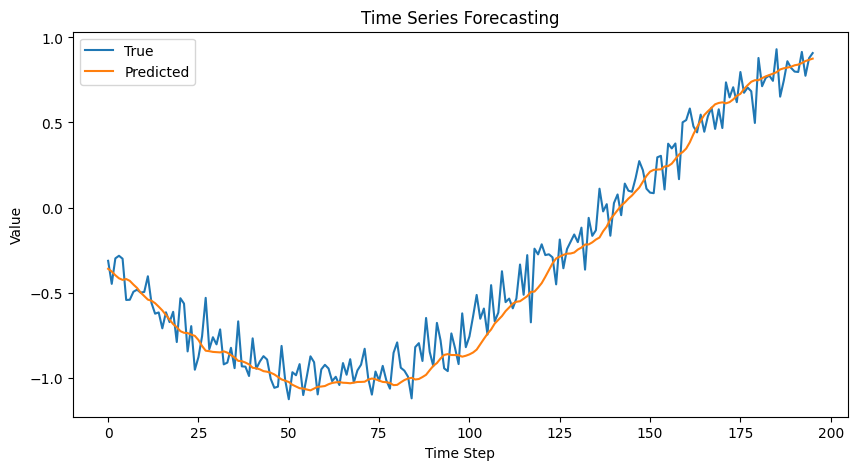

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Generate synthetic time series data
def generate_sine_wave(seq_length=1000):
    time = np.arange(0, seq_length)
    temp = np.sin(0.02 * time) + np.random.normal(0, 0.1, size=seq_length)
    return temp

series = generate_sine_wave()

# 2. Prepare the dataset
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 20
X, y = create_sequences(series, window_size)

# Reshape for RNN input: [samples, time_steps, features]
X = X[..., np.newaxis]
y = y[..., np.newaxis]

# 3. Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 4. Build the LSTM model
model = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    layers.LSTM(32),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 5. Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# 6. Evaluate and visualize
predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.title("Time Series Forecasting")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()
